# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

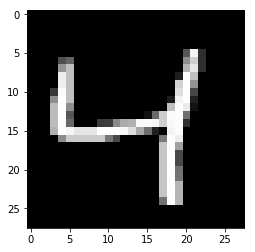

In [9]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [34]:
# Size of the encoding layer (the hidden layer)
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784])
targets_ = tf.placeholder(tf.float32, [None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
h_weights = tf.Variable(tf.random_normal([784, 784]), name="h_weights")
h_bias = tf.Variable(tf.random_normal([784]), name="h_bias")

encoded = tf.add(tf.matmul(inputs_, h_weights), h_bias)
encoded = tf.nn.relu(encoded)

# Output layer logits, fully connected layer with no activation
logits = tf.add(tf.matmul(encoded, h_weights), h_bias)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [28]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [29]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 70.8503
Epoch: 1/20... Training loss: 67.6038
Epoch: 1/20... Training loss: 68.3643
Epoch: 1/20... Training loss: 66.4588
Epoch: 1/20... Training loss: 65.4219
Epoch: 1/20... Training loss: 63.0081
Epoch: 1/20... Training loss: 60.6984
Epoch: 1/20... Training loss: 59.2331
Epoch: 1/20... Training loss: 58.1271
Epoch: 1/20... Training loss: 56.2392
Epoch: 1/20... Training loss: 54.5002
Epoch: 1/20... Training loss: 53.3906
Epoch: 1/20... Training loss: 51.9944
Epoch: 1/20... Training loss: 50.7360
Epoch: 1/20... Training loss: 50.4583
Epoch: 1/20... Training loss: 47.6316
Epoch: 1/20... Training loss: 47.2540
Epoch: 1/20... Training loss: 45.9066
Epoch: 1/20... Training loss: 45.4845
Epoch: 1/20... Training loss: 44.1853
Epoch: 1/20... Training loss: 43.7015
Epoch: 1/20... Training loss: 42.4079
Epoch: 1/20... Training loss: 41.6292
Epoch: 1/20... Training loss: 40.2668
Epoch: 1/20... Training loss: 39.5741
Epoch: 1/20... Training loss: 38.9071
Epoch: 1/20.

Epoch: 1/20... Training loss: 7.1836
Epoch: 1/20... Training loss: 6.7092
Epoch: 1/20... Training loss: 7.5584
Epoch: 1/20... Training loss: 7.1964
Epoch: 1/20... Training loss: 6.8781
Epoch: 1/20... Training loss: 7.0865
Epoch: 1/20... Training loss: 6.9421
Epoch: 1/20... Training loss: 7.0659
Epoch: 1/20... Training loss: 6.7307
Epoch: 1/20... Training loss: 6.9890
Epoch: 1/20... Training loss: 6.7566
Epoch: 1/20... Training loss: 6.9528
Epoch: 1/20... Training loss: 6.8990
Epoch: 1/20... Training loss: 7.0222
Epoch: 1/20... Training loss: 7.0520
Epoch: 1/20... Training loss: 7.0373
Epoch: 1/20... Training loss: 6.8447
Epoch: 1/20... Training loss: 6.5428
Epoch: 1/20... Training loss: 6.9041
Epoch: 1/20... Training loss: 6.8338
Epoch: 1/20... Training loss: 6.8431
Epoch: 1/20... Training loss: 7.0213
Epoch: 1/20... Training loss: 6.8765
Epoch: 1/20... Training loss: 6.5534
Epoch: 1/20... Training loss: 6.7429
Epoch: 1/20... Training loss: 6.9629
Epoch: 1/20... Training loss: 6.8159
E

Epoch: 2/20... Training loss: 4.0357
Epoch: 2/20... Training loss: 3.9048
Epoch: 2/20... Training loss: 3.9936
Epoch: 2/20... Training loss: 4.1879
Epoch: 2/20... Training loss: 3.9101
Epoch: 2/20... Training loss: 4.0773
Epoch: 2/20... Training loss: 4.0247
Epoch: 2/20... Training loss: 4.1269
Epoch: 2/20... Training loss: 4.1107
Epoch: 2/20... Training loss: 4.0663
Epoch: 2/20... Training loss: 3.9738
Epoch: 2/20... Training loss: 4.1626
Epoch: 2/20... Training loss: 3.7533
Epoch: 2/20... Training loss: 4.0013
Epoch: 2/20... Training loss: 3.8424
Epoch: 2/20... Training loss: 3.9209
Epoch: 2/20... Training loss: 3.8161
Epoch: 2/20... Training loss: 3.9224
Epoch: 2/20... Training loss: 3.7634
Epoch: 2/20... Training loss: 3.8106
Epoch: 2/20... Training loss: 4.1421
Epoch: 2/20... Training loss: 3.8412
Epoch: 2/20... Training loss: 4.0937
Epoch: 2/20... Training loss: 3.8613
Epoch: 2/20... Training loss: 3.9162
Epoch: 2/20... Training loss: 3.8307
Epoch: 2/20... Training loss: 3.7881
E

Epoch: 3/20... Training loss: 2.9660
Epoch: 3/20... Training loss: 2.7899
Epoch: 3/20... Training loss: 2.7645
Epoch: 3/20... Training loss: 2.7214
Epoch: 3/20... Training loss: 2.7997
Epoch: 3/20... Training loss: 2.9119
Epoch: 3/20... Training loss: 2.8226
Epoch: 3/20... Training loss: 2.7257
Epoch: 3/20... Training loss: 2.5898
Epoch: 3/20... Training loss: 2.6608
Epoch: 3/20... Training loss: 2.8422
Epoch: 3/20... Training loss: 2.7661
Epoch: 3/20... Training loss: 2.7559
Epoch: 3/20... Training loss: 2.6910
Epoch: 3/20... Training loss: 2.7155
Epoch: 3/20... Training loss: 2.7487
Epoch: 3/20... Training loss: 2.8171
Epoch: 3/20... Training loss: 2.8115
Epoch: 3/20... Training loss: 2.7893
Epoch: 3/20... Training loss: 2.7988
Epoch: 3/20... Training loss: 2.7933
Epoch: 3/20... Training loss: 2.7163
Epoch: 3/20... Training loss: 2.8077
Epoch: 3/20... Training loss: 2.5789
Epoch: 3/20... Training loss: 2.7532
Epoch: 3/20... Training loss: 2.7248
Epoch: 3/20... Training loss: 2.7224
E

Epoch: 4/20... Training loss: 2.0837
Epoch: 4/20... Training loss: 2.0485
Epoch: 4/20... Training loss: 1.9994
Epoch: 4/20... Training loss: 1.9731
Epoch: 4/20... Training loss: 2.0929
Epoch: 4/20... Training loss: 2.0380
Epoch: 4/20... Training loss: 2.1600
Epoch: 4/20... Training loss: 2.1884
Epoch: 4/20... Training loss: 1.9891
Epoch: 4/20... Training loss: 2.0644
Epoch: 4/20... Training loss: 1.9748
Epoch: 4/20... Training loss: 2.1020
Epoch: 4/20... Training loss: 2.0520
Epoch: 4/20... Training loss: 1.9796
Epoch: 4/20... Training loss: 2.1195
Epoch: 4/20... Training loss: 1.9457
Epoch: 4/20... Training loss: 1.9876
Epoch: 4/20... Training loss: 2.0789
Epoch: 4/20... Training loss: 2.0133
Epoch: 4/20... Training loss: 2.0586
Epoch: 4/20... Training loss: 1.9098
Epoch: 4/20... Training loss: 2.1298
Epoch: 4/20... Training loss: 1.9372
Epoch: 4/20... Training loss: 1.9575
Epoch: 4/20... Training loss: 1.8889
Epoch: 4/20... Training loss: 2.1019
Epoch: 4/20... Training loss: 2.0440
E

Epoch: 5/20... Training loss: 1.4958
Epoch: 5/20... Training loss: 1.4787
Epoch: 5/20... Training loss: 1.5729
Epoch: 5/20... Training loss: 1.4786
Epoch: 5/20... Training loss: 1.5512
Epoch: 5/20... Training loss: 1.4808
Epoch: 5/20... Training loss: 1.4390
Epoch: 5/20... Training loss: 1.4728
Epoch: 5/20... Training loss: 1.4473
Epoch: 5/20... Training loss: 1.4472
Epoch: 5/20... Training loss: 1.4755
Epoch: 5/20... Training loss: 1.5219
Epoch: 5/20... Training loss: 1.5150
Epoch: 5/20... Training loss: 1.5116
Epoch: 5/20... Training loss: 1.4518
Epoch: 5/20... Training loss: 1.4789
Epoch: 5/20... Training loss: 1.4661
Epoch: 5/20... Training loss: 1.4280
Epoch: 5/20... Training loss: 1.4665
Epoch: 5/20... Training loss: 1.4010
Epoch: 5/20... Training loss: 1.4410
Epoch: 5/20... Training loss: 1.4436
Epoch: 5/20... Training loss: 1.5047
Epoch: 5/20... Training loss: 1.4379
Epoch: 5/20... Training loss: 1.5372
Epoch: 5/20... Training loss: 1.5013
Epoch: 5/20... Training loss: 1.4743
E

Epoch: 6/20... Training loss: 1.1006
Epoch: 6/20... Training loss: 1.0962
Epoch: 6/20... Training loss: 1.0430
Epoch: 6/20... Training loss: 1.0624
Epoch: 6/20... Training loss: 1.0423
Epoch: 6/20... Training loss: 1.0673
Epoch: 6/20... Training loss: 1.0412
Epoch: 6/20... Training loss: 1.0558
Epoch: 6/20... Training loss: 1.0685
Epoch: 6/20... Training loss: 1.0688
Epoch: 6/20... Training loss: 1.0712
Epoch: 6/20... Training loss: 1.0380
Epoch: 6/20... Training loss: 1.0219
Epoch: 6/20... Training loss: 1.0479
Epoch: 6/20... Training loss: 1.0738
Epoch: 6/20... Training loss: 0.9882
Epoch: 6/20... Training loss: 1.0941
Epoch: 6/20... Training loss: 1.0673
Epoch: 6/20... Training loss: 1.0195
Epoch: 6/20... Training loss: 1.0427
Epoch: 6/20... Training loss: 0.9716
Epoch: 6/20... Training loss: 1.0096
Epoch: 6/20... Training loss: 1.0226
Epoch: 6/20... Training loss: 1.0213
Epoch: 6/20... Training loss: 0.9696
Epoch: 6/20... Training loss: 1.0732
Epoch: 6/20... Training loss: 1.0370
E

Epoch: 6/20... Training loss: 0.7426
Epoch: 6/20... Training loss: 0.7455
Epoch: 6/20... Training loss: 0.7151
Epoch: 6/20... Training loss: 0.7306
Epoch: 6/20... Training loss: 0.6673
Epoch: 6/20... Training loss: 0.7320
Epoch: 6/20... Training loss: 0.7254
Epoch: 6/20... Training loss: 0.7133
Epoch: 6/20... Training loss: 0.7180
Epoch: 6/20... Training loss: 0.7087
Epoch: 6/20... Training loss: 0.6976
Epoch: 6/20... Training loss: 0.6808
Epoch: 6/20... Training loss: 0.6782
Epoch: 6/20... Training loss: 0.6890
Epoch: 6/20... Training loss: 0.6855
Epoch: 6/20... Training loss: 0.7263
Epoch: 6/20... Training loss: 0.7132
Epoch: 6/20... Training loss: 0.7027
Epoch: 6/20... Training loss: 0.6940
Epoch: 6/20... Training loss: 0.7448
Epoch: 6/20... Training loss: 0.6670
Epoch: 6/20... Training loss: 0.7210
Epoch: 6/20... Training loss: 0.6911
Epoch: 6/20... Training loss: 0.7122
Epoch: 6/20... Training loss: 0.7332
Epoch: 6/20... Training loss: 0.6959
Epoch: 6/20... Training loss: 0.7312
E

Epoch: 7/20... Training loss: 0.5681
Epoch: 7/20... Training loss: 0.5103
Epoch: 7/20... Training loss: 0.5125
Epoch: 7/20... Training loss: 0.5195
Epoch: 7/20... Training loss: 0.5386
Epoch: 7/20... Training loss: 0.5448
Epoch: 7/20... Training loss: 0.5037
Epoch: 7/20... Training loss: 0.5593
Epoch: 7/20... Training loss: 0.5198
Epoch: 7/20... Training loss: 0.5077
Epoch: 7/20... Training loss: 0.5195
Epoch: 7/20... Training loss: 0.5130
Epoch: 7/20... Training loss: 0.5242
Epoch: 7/20... Training loss: 0.5026
Epoch: 7/20... Training loss: 0.5459
Epoch: 7/20... Training loss: 0.5054
Epoch: 7/20... Training loss: 0.5368
Epoch: 7/20... Training loss: 0.5056
Epoch: 7/20... Training loss: 0.5025
Epoch: 7/20... Training loss: 0.5324
Epoch: 7/20... Training loss: 0.5184
Epoch: 7/20... Training loss: 0.5075
Epoch: 7/20... Training loss: 0.4917
Epoch: 7/20... Training loss: 0.5255
Epoch: 7/20... Training loss: 0.5054
Epoch: 7/20... Training loss: 0.5194
Epoch: 7/20... Training loss: 0.5358
E

Epoch: 8/20... Training loss: 0.4229
Epoch: 8/20... Training loss: 0.4258
Epoch: 8/20... Training loss: 0.4046
Epoch: 8/20... Training loss: 0.4190
Epoch: 8/20... Training loss: 0.3995
Epoch: 8/20... Training loss: 0.4143
Epoch: 8/20... Training loss: 0.3970
Epoch: 8/20... Training loss: 0.3983
Epoch: 8/20... Training loss: 0.3940
Epoch: 8/20... Training loss: 0.4049
Epoch: 8/20... Training loss: 0.3869
Epoch: 8/20... Training loss: 0.4003
Epoch: 8/20... Training loss: 0.3916
Epoch: 8/20... Training loss: 0.3884
Epoch: 8/20... Training loss: 0.4069
Epoch: 8/20... Training loss: 0.4005
Epoch: 8/20... Training loss: 0.3965
Epoch: 8/20... Training loss: 0.4279
Epoch: 8/20... Training loss: 0.4094
Epoch: 8/20... Training loss: 0.4134
Epoch: 8/20... Training loss: 0.4050
Epoch: 8/20... Training loss: 0.4020
Epoch: 8/20... Training loss: 0.4092
Epoch: 8/20... Training loss: 0.4073
Epoch: 8/20... Training loss: 0.4105
Epoch: 8/20... Training loss: 0.3982
Epoch: 8/20... Training loss: 0.4043
E

Epoch: 9/20... Training loss: 0.3219
Epoch: 9/20... Training loss: 0.3259
Epoch: 9/20... Training loss: 0.3352
Epoch: 9/20... Training loss: 0.3319
Epoch: 9/20... Training loss: 0.3555
Epoch: 9/20... Training loss: 0.3420
Epoch: 9/20... Training loss: 0.3539
Epoch: 9/20... Training loss: 0.3284
Epoch: 9/20... Training loss: 0.3399
Epoch: 9/20... Training loss: 0.3341
Epoch: 9/20... Training loss: 0.3381
Epoch: 9/20... Training loss: 0.3409
Epoch: 9/20... Training loss: 0.3327
Epoch: 9/20... Training loss: 0.3447
Epoch: 9/20... Training loss: 0.3476
Epoch: 9/20... Training loss: 0.3250
Epoch: 9/20... Training loss: 0.3657
Epoch: 9/20... Training loss: 0.3381
Epoch: 9/20... Training loss: 0.3598
Epoch: 9/20... Training loss: 0.3312
Epoch: 9/20... Training loss: 0.3091
Epoch: 9/20... Training loss: 0.3613
Epoch: 9/20... Training loss: 0.3529
Epoch: 9/20... Training loss: 0.3488
Epoch: 9/20... Training loss: 0.3358
Epoch: 9/20... Training loss: 0.3371
Epoch: 9/20... Training loss: 0.3458
E

Epoch: 10/20... Training loss: 0.2979
Epoch: 10/20... Training loss: 0.2971
Epoch: 10/20... Training loss: 0.2874
Epoch: 10/20... Training loss: 0.2951
Epoch: 10/20... Training loss: 0.2958
Epoch: 10/20... Training loss: 0.2799
Epoch: 10/20... Training loss: 0.3002
Epoch: 10/20... Training loss: 0.2951
Epoch: 10/20... Training loss: 0.3087
Epoch: 10/20... Training loss: 0.3057
Epoch: 10/20... Training loss: 0.2934
Epoch: 10/20... Training loss: 0.3013
Epoch: 10/20... Training loss: 0.2944
Epoch: 10/20... Training loss: 0.2956
Epoch: 10/20... Training loss: 0.3116
Epoch: 10/20... Training loss: 0.2900
Epoch: 10/20... Training loss: 0.2896
Epoch: 10/20... Training loss: 0.2777
Epoch: 10/20... Training loss: 0.2931
Epoch: 10/20... Training loss: 0.2933
Epoch: 10/20... Training loss: 0.2881
Epoch: 10/20... Training loss: 0.2906
Epoch: 10/20... Training loss: 0.2806
Epoch: 10/20... Training loss: 0.2863
Epoch: 10/20... Training loss: 0.2821
Epoch: 10/20... Training loss: 0.2967
Epoch: 10/20

Epoch: 11/20... Training loss: 0.2577
Epoch: 11/20... Training loss: 0.2639
Epoch: 11/20... Training loss: 0.2610
Epoch: 11/20... Training loss: 0.2451
Epoch: 11/20... Training loss: 0.2797
Epoch: 11/20... Training loss: 0.2715
Epoch: 11/20... Training loss: 0.2585
Epoch: 11/20... Training loss: 0.2634
Epoch: 11/20... Training loss: 0.2544
Epoch: 11/20... Training loss: 0.2640
Epoch: 11/20... Training loss: 0.2596
Epoch: 11/20... Training loss: 0.2612
Epoch: 11/20... Training loss: 0.2674
Epoch: 11/20... Training loss: 0.2841
Epoch: 11/20... Training loss: 0.2667
Epoch: 11/20... Training loss: 0.2685
Epoch: 11/20... Training loss: 0.2720
Epoch: 11/20... Training loss: 0.2748
Epoch: 11/20... Training loss: 0.2596
Epoch: 11/20... Training loss: 0.2732
Epoch: 11/20... Training loss: 0.2524
Epoch: 11/20... Training loss: 0.2585
Epoch: 11/20... Training loss: 0.2546
Epoch: 11/20... Training loss: 0.2671
Epoch: 11/20... Training loss: 0.2660
Epoch: 11/20... Training loss: 0.2687
Epoch: 11/20

Epoch: 11/20... Training loss: 0.2467
Epoch: 11/20... Training loss: 0.2492
Epoch: 11/20... Training loss: 0.2475
Epoch: 11/20... Training loss: 0.2540
Epoch: 11/20... Training loss: 0.2516
Epoch: 11/20... Training loss: 0.2542
Epoch: 11/20... Training loss: 0.2602
Epoch: 11/20... Training loss: 0.2445
Epoch: 11/20... Training loss: 0.2486
Epoch: 11/20... Training loss: 0.2445
Epoch: 11/20... Training loss: 0.2382
Epoch: 11/20... Training loss: 0.2502
Epoch: 11/20... Training loss: 0.2525
Epoch: 11/20... Training loss: 0.2424
Epoch: 11/20... Training loss: 0.2467
Epoch: 11/20... Training loss: 0.2559
Epoch: 11/20... Training loss: 0.2600
Epoch: 11/20... Training loss: 0.2451
Epoch: 11/20... Training loss: 0.2475
Epoch: 11/20... Training loss: 0.2547
Epoch: 11/20... Training loss: 0.2446
Epoch: 11/20... Training loss: 0.2448
Epoch: 11/20... Training loss: 0.2384
Epoch: 11/20... Training loss: 0.2436
Epoch: 11/20... Training loss: 0.2405
Epoch: 11/20... Training loss: 0.2436
Epoch: 11/20

Epoch: 12/20... Training loss: 0.2387
Epoch: 12/20... Training loss: 0.2246
Epoch: 12/20... Training loss: 0.2437
Epoch: 12/20... Training loss: 0.2348
Epoch: 12/20... Training loss: 0.2348
Epoch: 12/20... Training loss: 0.2234
Epoch: 12/20... Training loss: 0.2364
Epoch: 12/20... Training loss: 0.2394
Epoch: 12/20... Training loss: 0.2363
Epoch: 12/20... Training loss: 0.2349
Epoch: 12/20... Training loss: 0.2427
Epoch: 12/20... Training loss: 0.2393
Epoch: 12/20... Training loss: 0.2269
Epoch: 12/20... Training loss: 0.2366
Epoch: 12/20... Training loss: 0.2310
Epoch: 12/20... Training loss: 0.2391
Epoch: 12/20... Training loss: 0.2307
Epoch: 12/20... Training loss: 0.2384
Epoch: 12/20... Training loss: 0.2364
Epoch: 12/20... Training loss: 0.2344
Epoch: 12/20... Training loss: 0.2210
Epoch: 12/20... Training loss: 0.2453
Epoch: 12/20... Training loss: 0.2294
Epoch: 12/20... Training loss: 0.2267
Epoch: 12/20... Training loss: 0.2403
Epoch: 12/20... Training loss: 0.2398
Epoch: 12/20

Epoch: 13/20... Training loss: 0.2176
Epoch: 13/20... Training loss: 0.2198
Epoch: 13/20... Training loss: 0.2389
Epoch: 13/20... Training loss: 0.2184
Epoch: 13/20... Training loss: 0.2189
Epoch: 13/20... Training loss: 0.2323
Epoch: 13/20... Training loss: 0.2157
Epoch: 13/20... Training loss: 0.2225
Epoch: 13/20... Training loss: 0.2273
Epoch: 13/20... Training loss: 0.2106
Epoch: 13/20... Training loss: 0.2246
Epoch: 13/20... Training loss: 0.2231
Epoch: 13/20... Training loss: 0.2305
Epoch: 13/20... Training loss: 0.2206
Epoch: 13/20... Training loss: 0.2233
Epoch: 13/20... Training loss: 0.2199
Epoch: 13/20... Training loss: 0.2155
Epoch: 13/20... Training loss: 0.2323
Epoch: 13/20... Training loss: 0.2250
Epoch: 13/20... Training loss: 0.2410
Epoch: 13/20... Training loss: 0.2220
Epoch: 13/20... Training loss: 0.2322
Epoch: 13/20... Training loss: 0.2257
Epoch: 13/20... Training loss: 0.2261
Epoch: 13/20... Training loss: 0.2236
Epoch: 13/20... Training loss: 0.2137
Epoch: 13/20

Epoch: 14/20... Training loss: 0.2143
Epoch: 14/20... Training loss: 0.2182
Epoch: 14/20... Training loss: 0.2229
Epoch: 14/20... Training loss: 0.2066
Epoch: 14/20... Training loss: 0.2131
Epoch: 14/20... Training loss: 0.2233
Epoch: 14/20... Training loss: 0.2060
Epoch: 14/20... Training loss: 0.2179
Epoch: 14/20... Training loss: 0.2091
Epoch: 14/20... Training loss: 0.2147
Epoch: 14/20... Training loss: 0.2238
Epoch: 14/20... Training loss: 0.1993
Epoch: 14/20... Training loss: 0.2123
Epoch: 14/20... Training loss: 0.2251
Epoch: 14/20... Training loss: 0.2207
Epoch: 14/20... Training loss: 0.2185
Epoch: 14/20... Training loss: 0.2217
Epoch: 14/20... Training loss: 0.2165
Epoch: 14/20... Training loss: 0.2160
Epoch: 14/20... Training loss: 0.2124
Epoch: 14/20... Training loss: 0.2190
Epoch: 14/20... Training loss: 0.2120
Epoch: 14/20... Training loss: 0.2145
Epoch: 14/20... Training loss: 0.2154
Epoch: 14/20... Training loss: 0.2141
Epoch: 14/20... Training loss: 0.2154
Epoch: 14/20

Epoch: 15/20... Training loss: 0.2032
Epoch: 15/20... Training loss: 0.2093
Epoch: 15/20... Training loss: 0.2084
Epoch: 15/20... Training loss: 0.2159
Epoch: 15/20... Training loss: 0.2166
Epoch: 15/20... Training loss: 0.2108
Epoch: 15/20... Training loss: 0.2109
Epoch: 15/20... Training loss: 0.2050
Epoch: 15/20... Training loss: 0.2100
Epoch: 15/20... Training loss: 0.2079
Epoch: 15/20... Training loss: 0.2129
Epoch: 15/20... Training loss: 0.2036
Epoch: 15/20... Training loss: 0.2163
Epoch: 15/20... Training loss: 0.2036
Epoch: 15/20... Training loss: 0.2056
Epoch: 15/20... Training loss: 0.2113
Epoch: 15/20... Training loss: 0.2138
Epoch: 15/20... Training loss: 0.2013
Epoch: 15/20... Training loss: 0.2044
Epoch: 15/20... Training loss: 0.2057
Epoch: 15/20... Training loss: 0.2068
Epoch: 15/20... Training loss: 0.2049
Epoch: 15/20... Training loss: 0.2066
Epoch: 15/20... Training loss: 0.2043
Epoch: 15/20... Training loss: 0.2061
Epoch: 15/20... Training loss: 0.2170
Epoch: 15/20

Epoch: 15/20... Training loss: 0.2115
Epoch: 16/20... Training loss: 0.2077
Epoch: 16/20... Training loss: 0.2032
Epoch: 16/20... Training loss: 0.1979
Epoch: 16/20... Training loss: 0.1963
Epoch: 16/20... Training loss: 0.2029
Epoch: 16/20... Training loss: 0.2048
Epoch: 16/20... Training loss: 0.2038
Epoch: 16/20... Training loss: 0.2168
Epoch: 16/20... Training loss: 0.1988
Epoch: 16/20... Training loss: 0.2025
Epoch: 16/20... Training loss: 0.1983
Epoch: 16/20... Training loss: 0.2036
Epoch: 16/20... Training loss: 0.2002
Epoch: 16/20... Training loss: 0.1993
Epoch: 16/20... Training loss: 0.1974
Epoch: 16/20... Training loss: 0.2010
Epoch: 16/20... Training loss: 0.2094
Epoch: 16/20... Training loss: 0.1957
Epoch: 16/20... Training loss: 0.1990
Epoch: 16/20... Training loss: 0.2032
Epoch: 16/20... Training loss: 0.2116
Epoch: 16/20... Training loss: 0.1911
Epoch: 16/20... Training loss: 0.2084
Epoch: 16/20... Training loss: 0.1990
Epoch: 16/20... Training loss: 0.2050
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1965
Epoch: 16/20... Training loss: 0.2044
Epoch: 16/20... Training loss: 0.1916
Epoch: 16/20... Training loss: 0.2036
Epoch: 16/20... Training loss: 0.1952
Epoch: 16/20... Training loss: 0.1945
Epoch: 16/20... Training loss: 0.2001
Epoch: 16/20... Training loss: 0.2026
Epoch: 16/20... Training loss: 0.2010
Epoch: 16/20... Training loss: 0.2045
Epoch: 16/20... Training loss: 0.2009
Epoch: 16/20... Training loss: 0.1944
Epoch: 16/20... Training loss: 0.2011
Epoch: 16/20... Training loss: 0.2042
Epoch: 16/20... Training loss: 0.1991
Epoch: 16/20... Training loss: 0.1985
Epoch: 16/20... Training loss: 0.1859
Epoch: 16/20... Training loss: 0.1981
Epoch: 16/20... Training loss: 0.1886
Epoch: 16/20... Training loss: 0.1957
Epoch: 16/20... Training loss: 0.1964
Epoch: 16/20... Training loss: 0.1955
Epoch: 16/20... Training loss: 0.1987
Epoch: 16/20... Training loss: 0.2032
Epoch: 16/20... Training loss: 0.1958
Epoch: 16/20... Training loss: 0.2043
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1934
Epoch: 17/20... Training loss: 0.1927
Epoch: 17/20... Training loss: 0.2012
Epoch: 17/20... Training loss: 0.1824
Epoch: 17/20... Training loss: 0.1923
Epoch: 17/20... Training loss: 0.1920
Epoch: 17/20... Training loss: 0.1973
Epoch: 17/20... Training loss: 0.1962
Epoch: 17/20... Training loss: 0.1946
Epoch: 17/20... Training loss: 0.1937
Epoch: 17/20... Training loss: 0.1932
Epoch: 17/20... Training loss: 0.1962
Epoch: 17/20... Training loss: 0.1976
Epoch: 17/20... Training loss: 0.1903
Epoch: 17/20... Training loss: 0.1984
Epoch: 17/20... Training loss: 0.1844
Epoch: 17/20... Training loss: 0.1896
Epoch: 17/20... Training loss: 0.1938
Epoch: 17/20... Training loss: 0.1967
Epoch: 17/20... Training loss: 0.2011
Epoch: 17/20... Training loss: 0.1869
Epoch: 17/20... Training loss: 0.1936
Epoch: 17/20... Training loss: 0.1988
Epoch: 17/20... Training loss: 0.1932
Epoch: 17/20... Training loss: 0.1981
Epoch: 17/20... Training loss: 0.2056
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1917
Epoch: 18/20... Training loss: 0.1898
Epoch: 18/20... Training loss: 0.1827
Epoch: 18/20... Training loss: 0.1904
Epoch: 18/20... Training loss: 0.1943
Epoch: 18/20... Training loss: 0.1975
Epoch: 18/20... Training loss: 0.1870
Epoch: 18/20... Training loss: 0.1918
Epoch: 18/20... Training loss: 0.1841
Epoch: 18/20... Training loss: 0.1850
Epoch: 18/20... Training loss: 0.1931
Epoch: 18/20... Training loss: 0.1906
Epoch: 18/20... Training loss: 0.1950
Epoch: 18/20... Training loss: 0.1984
Epoch: 18/20... Training loss: 0.1913
Epoch: 18/20... Training loss: 0.1937
Epoch: 18/20... Training loss: 0.1947
Epoch: 18/20... Training loss: 0.1976
Epoch: 18/20... Training loss: 0.1830
Epoch: 18/20... Training loss: 0.1956
Epoch: 18/20... Training loss: 0.1865
Epoch: 18/20... Training loss: 0.1964
Epoch: 18/20... Training loss: 0.1922
Epoch: 18/20... Training loss: 0.1950
Epoch: 18/20... Training loss: 0.1910
Epoch: 18/20... Training loss: 0.1869
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1859
Epoch: 19/20... Training loss: 0.1784
Epoch: 19/20... Training loss: 0.1878
Epoch: 19/20... Training loss: 0.1908
Epoch: 19/20... Training loss: 0.1874
Epoch: 19/20... Training loss: 0.1955
Epoch: 19/20... Training loss: 0.1835
Epoch: 19/20... Training loss: 0.1822
Epoch: 19/20... Training loss: 0.1907
Epoch: 19/20... Training loss: 0.1840
Epoch: 19/20... Training loss: 0.1908
Epoch: 19/20... Training loss: 0.1880
Epoch: 19/20... Training loss: 0.1895
Epoch: 19/20... Training loss: 0.1882
Epoch: 19/20... Training loss: 0.1855
Epoch: 19/20... Training loss: 0.1873
Epoch: 19/20... Training loss: 0.1876
Epoch: 19/20... Training loss: 0.1840
Epoch: 19/20... Training loss: 0.1906
Epoch: 19/20... Training loss: 0.1883
Epoch: 19/20... Training loss: 0.1908
Epoch: 19/20... Training loss: 0.1879
Epoch: 19/20... Training loss: 0.1804
Epoch: 19/20... Training loss: 0.1825
Epoch: 19/20... Training loss: 0.1938
Epoch: 19/20... Training loss: 0.1894
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1907
Epoch: 20/20... Training loss: 0.1905
Epoch: 20/20... Training loss: 0.1904
Epoch: 20/20... Training loss: 0.1911
Epoch: 20/20... Training loss: 0.1861
Epoch: 20/20... Training loss: 0.1874
Epoch: 20/20... Training loss: 0.1784
Epoch: 20/20... Training loss: 0.1842
Epoch: 20/20... Training loss: 0.1822
Epoch: 20/20... Training loss: 0.1924
Epoch: 20/20... Training loss: 0.1878
Epoch: 20/20... Training loss: 0.1827
Epoch: 20/20... Training loss: 0.1780
Epoch: 20/20... Training loss: 0.1846
Epoch: 20/20... Training loss: 0.1832
Epoch: 20/20... Training loss: 0.1762
Epoch: 20/20... Training loss: 0.1862
Epoch: 20/20... Training loss: 0.1894
Epoch: 20/20... Training loss: 0.1816
Epoch: 20/20... Training loss: 0.1820
Epoch: 20/20... Training loss: 0.1832
Epoch: 20/20... Training loss: 0.1882
Epoch: 20/20... Training loss: 0.1941
Epoch: 20/20... Training loss: 0.1830
Epoch: 20/20... Training loss: 0.1919
Epoch: 20/20... Training loss: 0.1853
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1816
Epoch: 20/20... Training loss: 0.1830
Epoch: 20/20... Training loss: 0.1776
Epoch: 20/20... Training loss: 0.1763
Epoch: 20/20... Training loss: 0.1818
Epoch: 20/20... Training loss: 0.1736
Epoch: 20/20... Training loss: 0.1837
Epoch: 20/20... Training loss: 0.1739
Epoch: 20/20... Training loss: 0.1884
Epoch: 20/20... Training loss: 0.1909
Epoch: 20/20... Training loss: 0.1884
Epoch: 20/20... Training loss: 0.1893
Epoch: 20/20... Training loss: 0.1787
Epoch: 20/20... Training loss: 0.1837


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

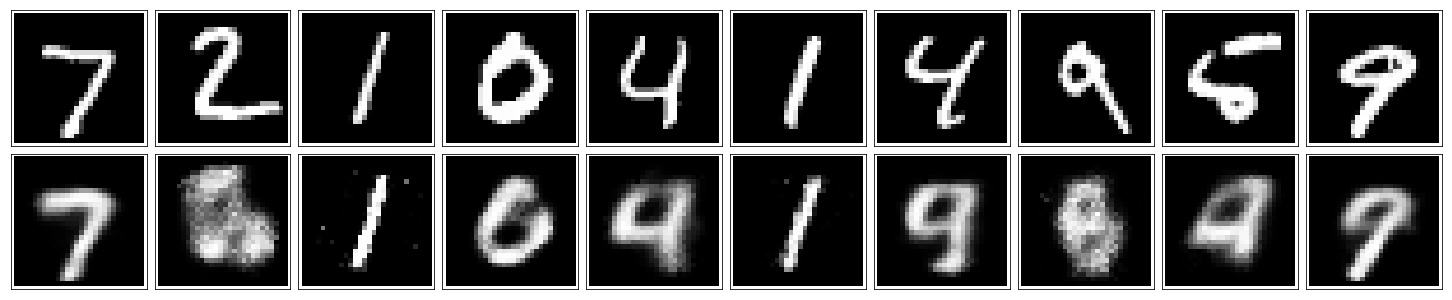

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [31]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.